<a href="https://colab.research.google.com/github/zj71/Computer-Vision/blob/main/CV_Lab_Session_4_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Overview
Welcome to todays lab session. In this lab we will briefly investigate some of the way that we might create binary images, and then apply morphological operators to them. This lab session will use a bit more OpenCV then previous labs, this is because it provides the code for the morphological operators.

This lab session will all be done by filling in the blanks in this Google Colab sheet. You'll need a google account to continue, but it's pretty straightforward to sign up if you don't have one already. 
The best thing to do would be to save a copy of this notebook in your personal google drive and edit it from there.

**Top Tips**
+ Check the documentation and links for help!
+ Remember assignment in Python is by reference! If you want to make a copy of a numpy object use [np.copy](https://numpy.org/doc/stable/reference/generated/numpy.copy.html) to do a [deepcopy](https://docs.python.org/3/library/copy.html).
+ Calling [plt.show](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.show.html) shows whatever you've been trying to visualise this far as a single figure. If you want multiple axis on a single figure you can use [subplot](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplot.html)

# Preparation
We are going to download some example images to work with, but you can upload your own images by following the colaboratory [guidance](https://colab.research.google.com/notebooks/io.ipynb). Personally, I think the easiest way to do it is to use the files menu on the side of the screen.

**Also, for this lab make sure you resize your images so they're not too big** This is because we would need to define some quite different parameters for the filters for them to work well.

In [ ]:
!wget "http://users.sussex.ac.uk/~is321/sad_snowman.jpg" -O sad_snowman.jpg
!wget "https://upload.wikimedia.org/wikipedia/commons/a/a0/Meeting_House%2C_University_of_Sussex.JPG" -O meeting_house.jpg
!wget "http://users.sussex.ac.uk/~is321/USbig.png" -O USbig.png

--2021-02-20 15:47:24--  http://users.sussex.ac.uk/~is321/sad_snowman.jpg
Resolving users.sussex.ac.uk (users.sussex.ac.uk)... 139.184.14.119
Connecting to users.sussex.ac.uk (users.sussex.ac.uk)|139.184.14.119|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 395733 (386K) [image/jpeg]
Saving to: ‘sad_snowman.jpg’

sad_snowman.jpg     100%[===================>] 386.46K   427KB/s    in 0.9s    

2021-02-20 15:47:25 (427 KB/s) - ‘sad_snowman.jpg’ saved [395733/395733]

--2021-02-20 15:47:25--  https://upload.wikimedia.org/wikipedia/commons/a/a0/Meeting_House%2C_University_of_Sussex.JPG
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1014224 (990K) [image/jpeg]
Saving to: ‘meeting_house.jpg’

meeting_house.jpg   100%[===================>] 990.45K  --.-KB/s    in 0.1s    

202

# Common Packages
We are also going to import some standard packages:
+ [opencv (cv2)](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html) A general purpose package for computer vision.
+ [matplotlib.pyplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html?highlight=pyplot#module-matplotlib.pyplot) A general purpose data visualising library
+ [numpy](https://numpy.org/doc/stable/) A numerical python package for arrays, linear algebra etc.

**Note** OpenCV loads the data as BGR by default

**Also, for this lab make sure you resize your images so they're not too big** This is because we would need to define some quite different parameters for the filters for them to work well.

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np

# Inserted some magic code to make the figures slightly larger, these numbers can be tweaked
plt.rcParams['figure.figsize'] = [10, 5]

img_ss = cv2.imread('./sad_snowman.jpg')
img_ss = cv2.cvtColor(img_ss, cv2.COLOR_BGR2RGB)

img_mh = cv2.imread('./meeting_house.jpg')
img_mh = cv2.cvtColor(img_mh, cv2.COLOR_BGR2RGB)

# Note that I'm converting directly to gray here!
img_us = cv2.imread('./USbig.png')
img_us = cv2.cvtColor(img_us, cv2.COLOR_BGR2GRAY)

# Let's resize the images to make them a bit smaller! Note the change in order
# of the shape using by the cv2.resize function
# Note that // does integer divison and always rounds down
img_mh = cv2.resize(img_mh, (img_mh.shape[1] // 6, img_mh.shape[0] // 6), interpolation=cv2.INTER_AREA)
img_ss = cv2.resize(img_ss, (img_ss.shape[1] // 8, img_ss.shape[0] // 8), interpolation=cv2.INTER_AREA)


# Creating binary images
As we saw in the lectures, binary images are often created by thresholding an image e.g. saying image >, <, ==, != some_number.

Let's try and create a binary image from the images that we've been given, or provide your own to look at. 

The easiest to binarise is the university of Sussex logo, img_us. The sad snowman is also quite straightforward (use a brightness threshold), and finally we could try finding a structure in the meeting house images based on the color (more difficult).

Whichever image you choose, we'll follow the same steps. Drawing the image, looking at the histogram and trying to figure out how to create a useful binary image. If you want some more ideas on this take a look at this OpenCV [guide](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html)



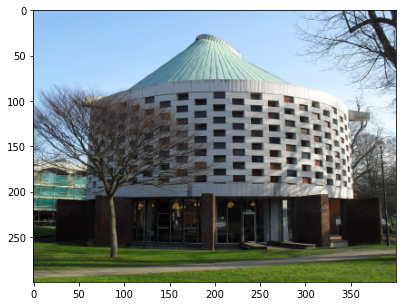

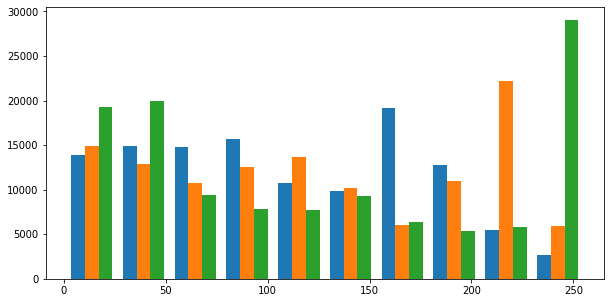

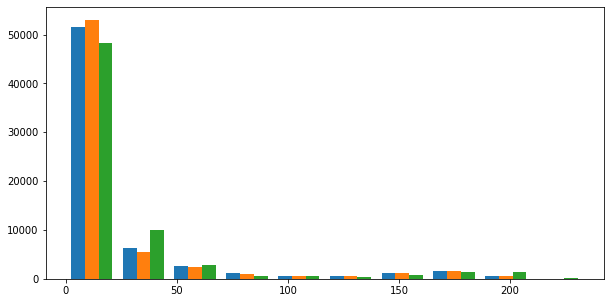

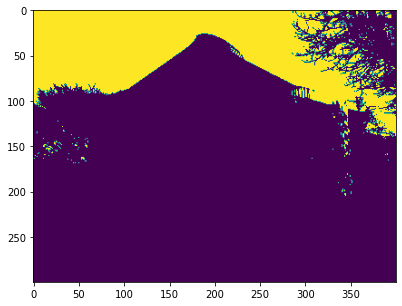

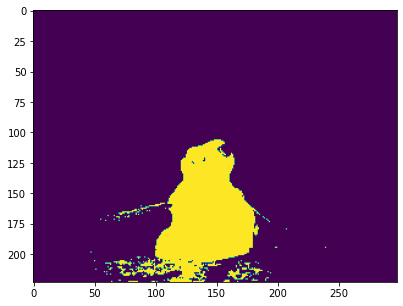

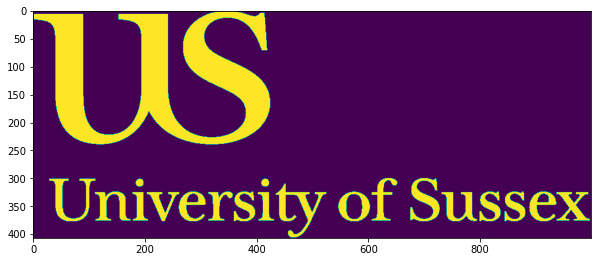

In [ ]:
# Beginning by plotting the colour image. From the image, what looks like a useful structure
# that you could extract by color/intensity alone? Some text? The sky? a building? A snowman?

plt.imshow(img_mh)
plt.show()

# How is the chosen image region distinct from everything else? is it brightness?
# in which case we should set a brightness threshold, or is it colour? In which
# case we could set a colour threshold.

# For choosing the specific threshold, it's often helpful to look at the image histogram
plt.hist(np.reshape(img_mh, (-1, 3)))
plt.show()

plt.hist(np.reshape(img_ss, (-1, 3)))
plt.show()

# Imagine I wanted to find all the Sky pixels, then we could set a threshold on the blue
# channel. We can get just the blue channel of the image by writing img[:,:,2]. If we wanted
# to have a brightness based threshold, then it's easier to convert to gray first.

# Threshold the image
sky_seg = img_mh[:,:,2] > 240
# Draw it
plt.imshow(sky_seg)
plt.show()

plt.imshow(np.mean(img_ss, axis=-1) > 60)
plt.show()

plt.imshow(img_us > 10)





# Morphological Operators
Once we've created some interesting binary images, let's try using the morphological operators that we've seen on them. (Erosion, dilation, opening, closing etc.) You can find out more from the OpenCV [documentation](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html). **Make sure the images are in uint8 rather than floating point**. I've provided an example of the cursed snowman to start you off, or use the results from the previous section.



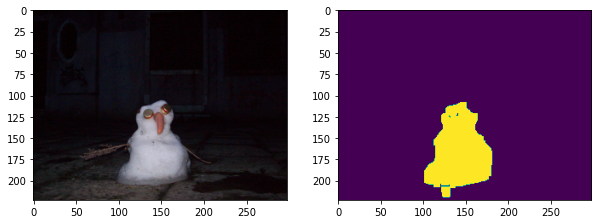

In [ ]:
ss_bin = np.uint8(np.mean(img_ss, axis=-1) > 60)
ss_open = cv2.morphologyEx(ss_bin, cv2.MORPH_OPEN, np.ones((7,7), dtype=np.uint8))
plt.subplot(121)
plt.imshow(img_ss)
plt.subplot(122)
plt.imshow(ss_open)
plt.show()

# Binary Contours
Given a binary image, we can find the contours (bounding polygon) around any of the objects in the image. We can then take measurements about each of the objects etc.

1. Let's begin by finding a good binary image to work with where we have several distinct objects. Either you can choose your own image, or you can use my example of the meeting house. I've included some pre-processing for this so we can have a rough go at counting the number and size of the visible windows. Alternativly, you could look at the Sussex logo and calculate the distibution of areas and perimeters of  the different letters.
2. Calculate and draw the visible image contours. Take a look at the documenation on finding/drawing contours with OpenCV [here](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contours_begin/py_contours_begin.html). Note that the version of OpenCV in Colab is slightly different from the docs and returns contours, hierarchy = cv2.findContours(...) . Given the set of contours, how many objects are visible in the binary image?
3. Calculate the area/perimeter of the different objects using [OpenCV](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_features/py_contour_features.html). Plot the results in a histogram. 
4. For the meeting house image, we could also look at the relationship between object centre in x and the object area. i.e. see how the visible area of windows changes as we go from left to right because of perspective. Use the provided function to calculate the x centroid of an object.


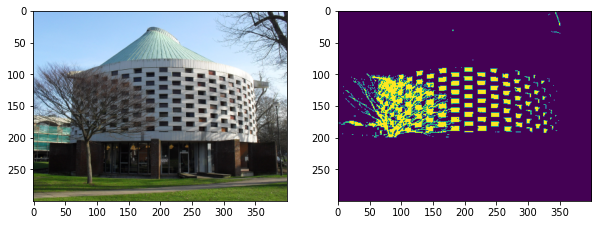

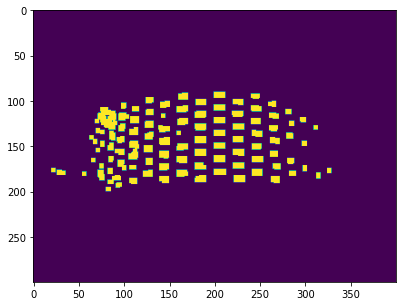

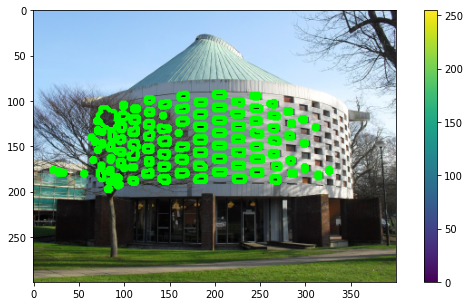

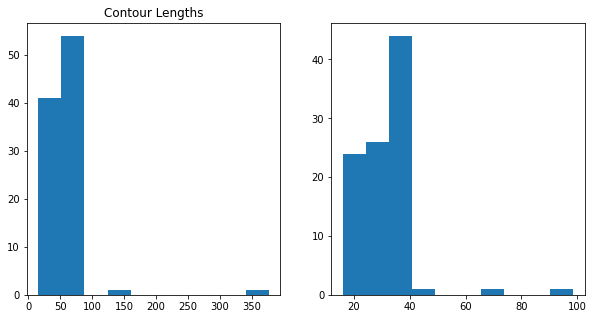

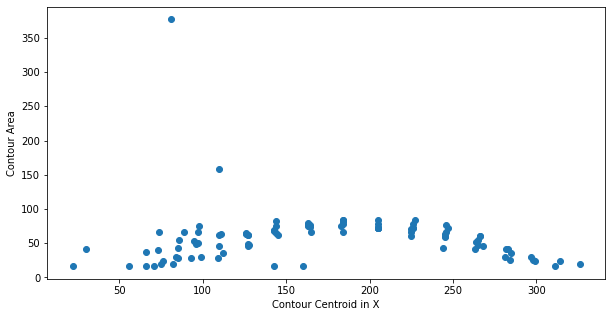

In [ ]:
# If you want to use my example of the meeting house, use the code below
# Find all of the darkly coloured pixels
mh_windows = np.uint8(np.mean(img_mh,axis=-1) < 70)
# Ignore everything below pixel 200
mh_windows[200:,...] = 0
# and everything to the right of 350
mh_windows[:, 350:] = 0
plt.subplot(1,2,1)
plt.imshow(img_mh)
plt.subplot(1,2,2)
plt.imshow(mh_windows)
plt.show()

# Let's tidy the image up with an Open operation.
mh_windows = cv2.morphologyEx(mh_windows, cv2.MORPH_OPEN, np.ones((5,5), dtype=np.uint8))
plt.imshow(mh_windows)
plt.show()

# Now calculate the image contours
contours, hierarchy = cv2.findContours(mh_windows,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
# Draw the image contours in a new image, note that cv2.drawContours overwrites the first argument
img_contours = np.copy(img_mh)#np.zeros(mh_windows.shape+(3,))
cv2.drawContours(img_contours, contours, -1, (0,255,0), 3)
plt.imshow(img_contours)
plt.colorbar()
plt.show()

# Calculate the area/arcLength of each of the contours and plot the histograms
lengths = [cv2.arcLength(contour, True) for contour in contours]
areas = [cv2.contourArea(contour) for contour in contours]
plt.subplot(1,2,1)
plt.title('Contour Areas')
plt.hist(areas)
plt.title('Contour Lengths')
plt.subplot(1,2,2)
plt.hist(lengths)
plt.show()

# Calculate the centre of a contour in the x direction
def calculate_x_centroid(contour):
  M = cv2.moments(contour)
  cx = int(M['m10']/M['m00'])
  return cx

x_centroids = [calculate_x_centroid(contour) for contour in contours]
plt.scatter(x_centroids, areas)
plt.xlabel('Contour Centroid in X')
plt.ylabel('Contour Area')
plt.show()



# Extensions
You don't have to do these, but if you complete the lab and want to learn more then give these a go! You also don't need to do them in any particular order.

+ Try converting the image to a different colour space such as LAB using cv2.cvtColor. LAB separates brightness and colour and will probably be easier to extract objects by colour. Try and extract different objects.
+ As in Lab 3, try either adding noise to the image or looking at a very noisy photo and then try creating a binary image from it? Do you need to change any of your processing steps to get similar results?


